<a href="https://colab.research.google.com/github/gaurav150/Deep-Learning/blob/main/digits__datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.express as px

In [4]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

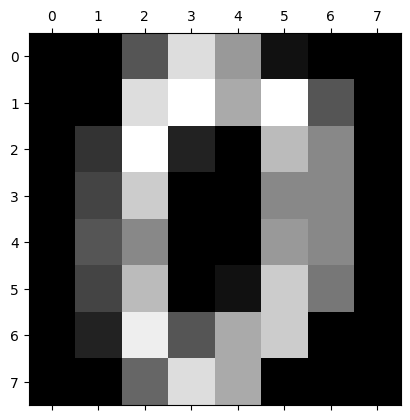

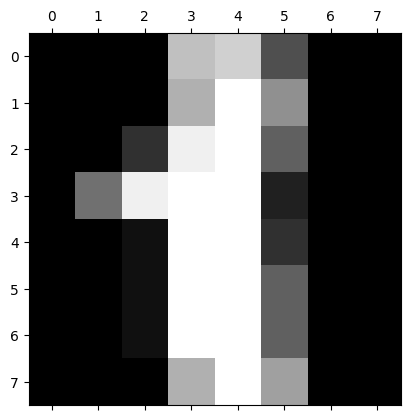

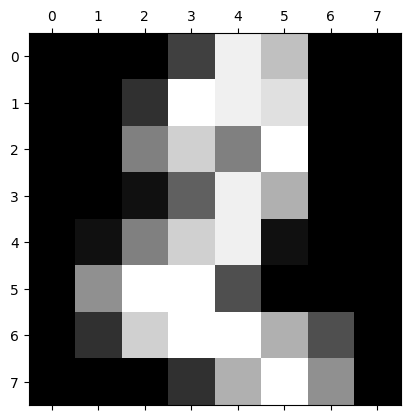

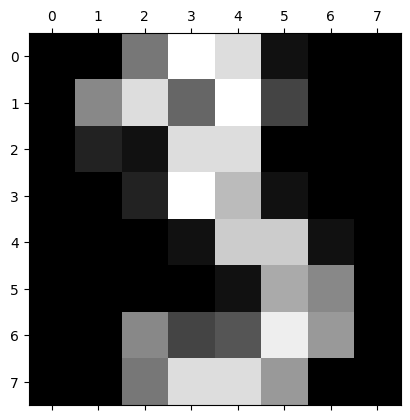

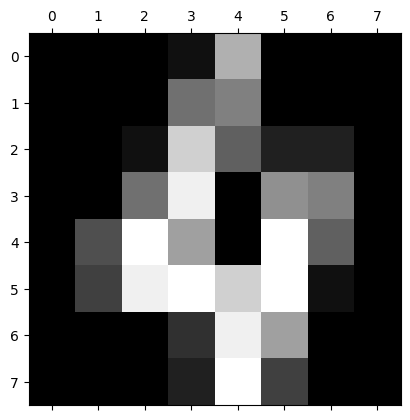

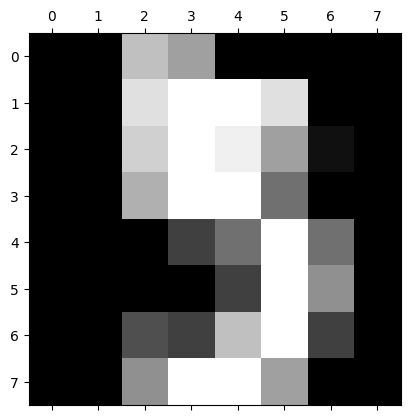

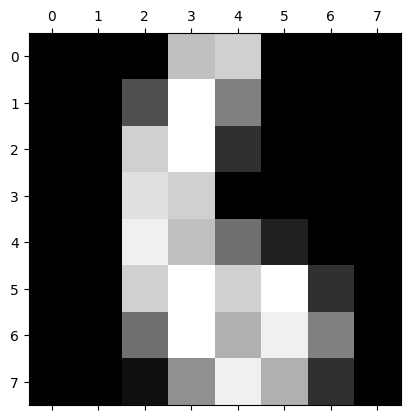

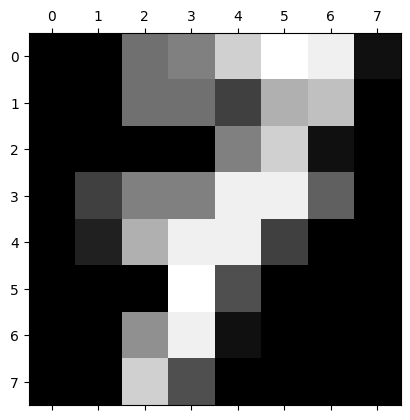

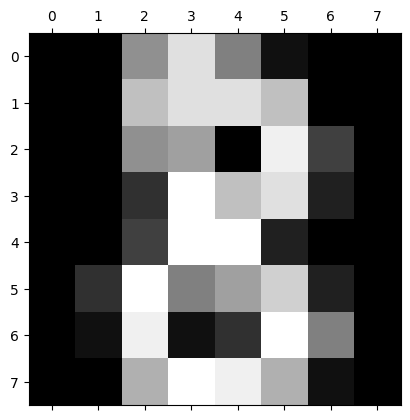

In [7]:
plt.gray()
for i in range(9):
  plt.matshow(digits.images[i])


In [6]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target']=digits.target

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis=1),df['target'],test_size=0.2)

In [16]:
df.shape

(1797, 65)

In [17]:
x_test.shape

(360, 64)

In [18]:
rnf = RandomForestClassifier(n_estimators=100)

In [19]:
rnf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred = rnf.predict(x_test)

In [21]:
rnf.score(x_test,y_test)

0.9805555555555555

In [22]:
cnm = confusion_matrix(y_test,y_pred)
cnm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 41,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 34]])

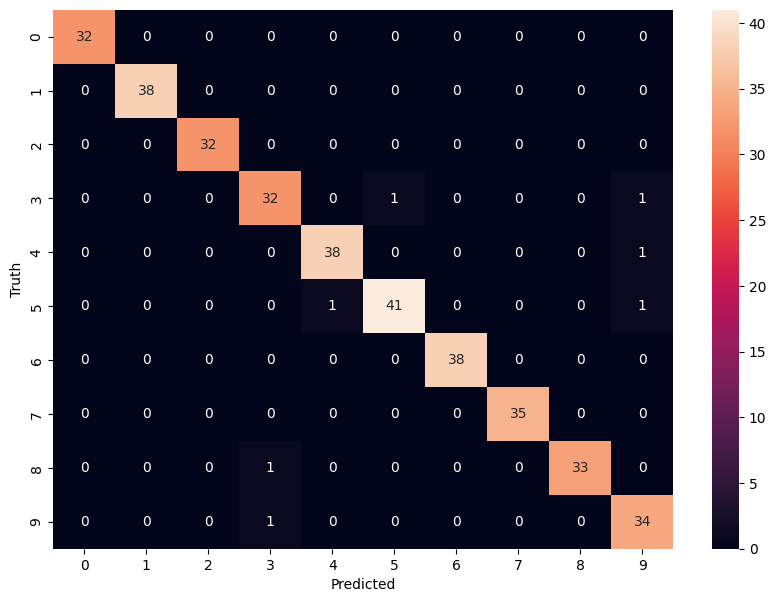

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(cnm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [23]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        32
           3       0.94      0.94      0.94        34
           4       0.97      0.97      0.97        39
           5       0.98      0.95      0.96        43
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        35
           8       1.00      0.97      0.99        34
           9       0.92      0.97      0.94        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [27]:
model_score,values = [],[]
for i in range(10,200,5):
  rnfi = RandomForestClassifier(n_estimators=i,n_jobs=-1)
  rnfi.fit(x_train,y_train)
  y_pred_i = rnfi.predict(x_test)
  model_i_score = rnfi.score(x_test,y_pred_i)
  model_score.append(model_i_score)
  values.append(i)

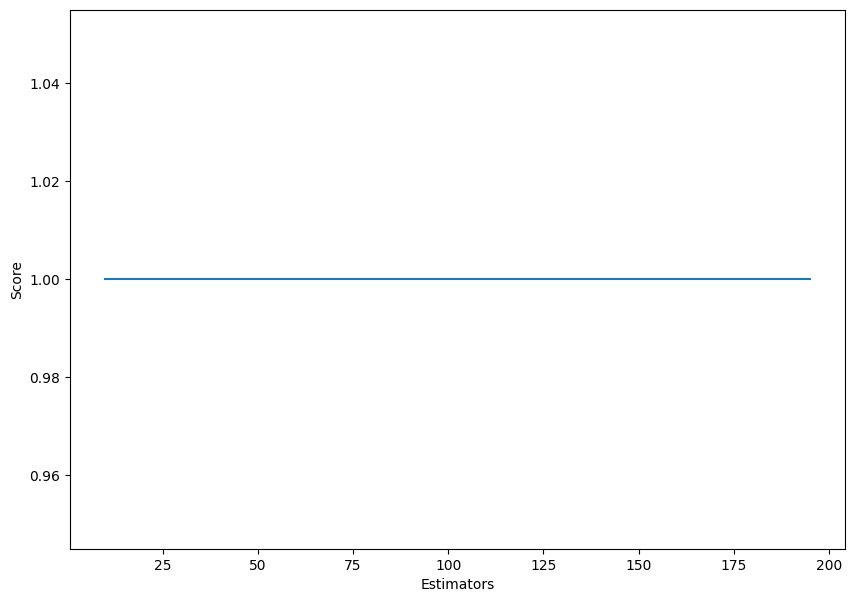

In [29]:
plt.figure(figsize=(10,7))
plt.plot(values,model_score)
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.show()

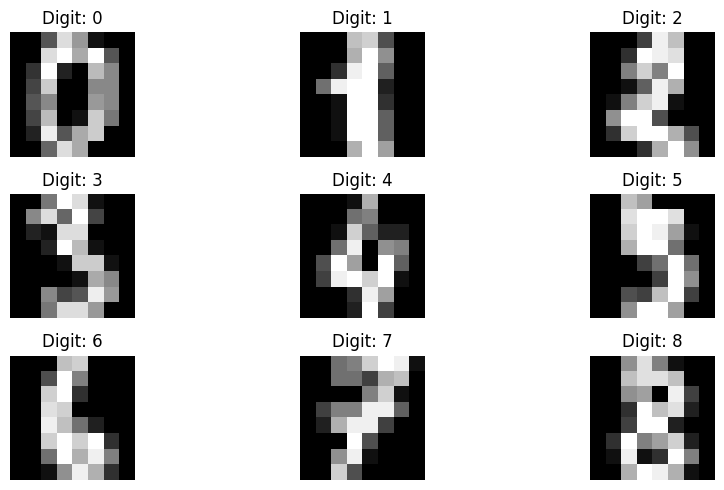

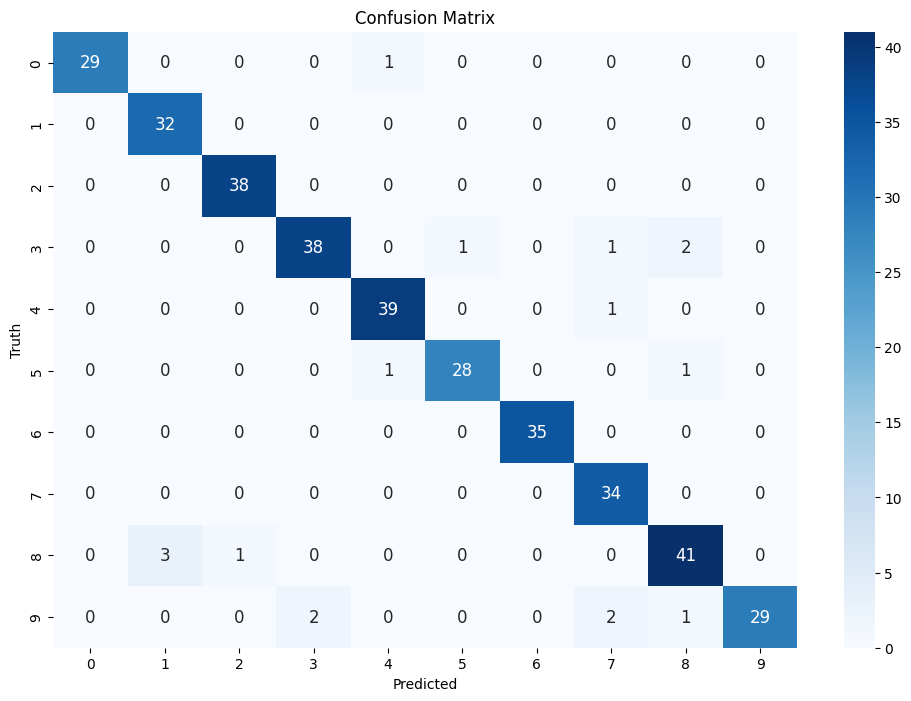

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.91      1.00      0.96        32
           2       0.97      1.00      0.99        38
           3       0.95      0.90      0.93        42
           4       0.95      0.97      0.96        40
           5       0.97      0.93      0.95        30
           6       1.00      1.00      1.00        35
           7       0.89      1.00      0.94        34
           8       0.91      0.91      0.91        45
           9       1.00      0.85      0.92        34

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



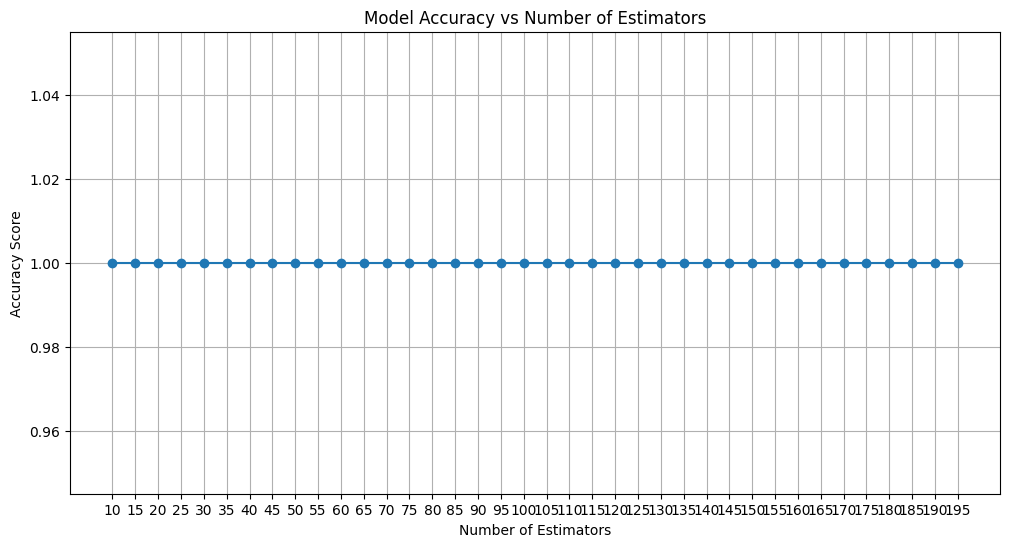

In [30]:
# prompt: in above cell i need more ckearerr graph

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

digits = load_digits()

# Displaying the first 9 images with improved clarity
plt.figure(figsize=(10, 5))  # Increased figure size
for i in range(9):
    plt.subplot(3, 3, i + 1)  # Subplots for better arrangement
    plt.imshow(digits.images[i], cmap='gray') # Specify cmap for grayscale
    plt.title(f"Digit: {digits.target[i]}") # Show target value
    plt.axis('off') # Hide axes for cleaner look
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

df = pd.DataFrame(digits.data)
df['target'] = digits.target

x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.2)

rnf = RandomForestClassifier(n_estimators=100)
rnf.fit(x_train, y_train)
y_pred = rnf.predict(x_test)

# Confusion Matrix with improved visualization
cnm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8)) # Increased figure size
sns.heatmap(cnm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12}) # fmt="d" for integer values
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix') # Added a title
plt.show()

print(classification_report(y_test, y_pred))

# Model Score vs Estimators Plot with improvements
model_score, values = [], []
for i in range(10, 200, 5):
    rnfi = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rnfi.fit(x_train, y_train)
    y_pred_i = rnfi.predict(x_test)
    model_i_score = rnfi.score(x_test, y_pred_i)
    model_score.append(model_i_score)
    values.append(i)

plt.figure(figsize=(12, 6)) # Increased figure size
plt.plot(values, model_score, marker='o', linestyle='-') # Added marker and linestyle
plt.xlabel('Number of Estimators') # More descriptive label
plt.ylabel('Accuracy Score') # More descriptive label
plt.title('Model Accuracy vs Number of Estimators') # Added title
plt.grid(True) # Added grid for better readability
plt.xticks(values)  # Show all x-axis values for better readability
plt.show()